# About The Dataset

In [52]:
#The Titanic dataset contains detailed information about 891 passengers who were aboard the RMS Titanic during its ill-fated voyage. 
#It includes attributes such as passenger ID, name, age, gender, ticket class, fare paid, cabin, number of family members aboard,
#and the port of embarkation. 
#The key feature, Survived, indicates whether a passenger lived or perished in the disaster. 
#This dataset serves as a classic example for data analysis and machine learning tasks, particularly for studying classification problems
#and understanding factors that influenced survival rates, such as gender, age, and passenger class. Some columns, like Age and Cabin, 
#contain missing values, making it suitable for exploring data cleaning and preprocessing techniques."""

# Importing Libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Overview Of The Dataset

In [56]:
# Reading the data set
df = pd.read_csv("titanic.csv")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [59]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [60]:
# Shape Of The Dataset (Rows,Columns)
print("The Shape of the dataset is",df.shape)

The Shape of the dataset is (891, 12)


In [61]:
# Description Of The Dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Column Details

In [63]:
#PassengerId – A unique identification number assigned to each passenger.

#Survived – Indicates whether the passenger survived (1) or not (0).

#Pclass – Passenger class representing socio-economic status: 1 = Upper, 2 = Middle, 3 = Lower.

#Name – Full name of the passenger, often including titles like Mr., Mrs., Miss, etc.

#Sex – Gender of the passenger (male or female).

#Age – Age of the passenger in years (some values are missing).

#SibSp – Number of siblings or spouses traveling with the passenger aboard the Titanic.

#Parch – Number of parents or children traveling with the passenger aboard.

#Ticket – Ticket number assigned to the passenger.

#Fare – Amount of money the passenger paid for the ticket.

#Cabin – Cabin number where the passenger stayed (many values are missing).

#Embarked – Port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton.

# Data Cleaning

In [65]:
#lets check the duplicated values

In [66]:
df.duplicated().value_counts()

False    891
Name: count, dtype: int64

In [67]:
#there is no duplicated values in the data set 
#lets check for null values

In [68]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [69]:
#there is a some null values 

In [70]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [71]:
# lets drop the cabin column because it has more null values 

In [72]:
df = df.drop(columns=["Cabin"])

In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [74]:
# cabin column has been removed

In [101]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [103]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [105]:
df["Age"] = df["Age"].astype("int")

In [109]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [111]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [168]:
# therefore there is no null values 

In [ ]:
# lets perform outlier detection

In [170]:
target_columns = df[["Age","SibSp","Parch","Fare"]]
Q1 = target_columns.quantile(0.25)
Q3 = target_columns.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

Age      13.0000
SibSp     1.0000
Parch     0.0000
Fare     23.0896
dtype: float64


In [ ]:
# lets remove the outliers

In [174]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [176]:
df_cleaned = df[~((df[target_columns.columns] < lower_bound) | (df[target_columns.columns] > upper_bound)).any(axis=1)]

In [178]:
print("The shape before removing the outliers",df.shape)
print("The shape after removing the outliers",df_cleaned.shape)

The shape before removing the outliers (891, 11)
The shape after removing the outliers (577, 11)


# Visualization Of The Data

In [116]:
# Survival Count

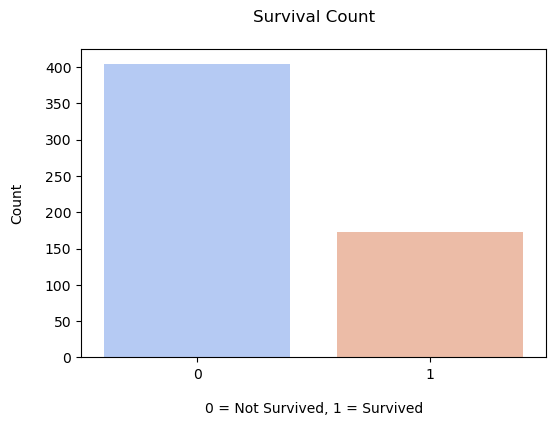

In [182]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df_cleaned, palette='coolwarm')
plt.title("Survival Count",pad=20)
plt.xlabel("0 = Not Survived, 1 = Survived",labelpad=15)
plt.ylabel("Count",labelpad=15)
plt.show()

In [122]:
# Passenger Class Distribution

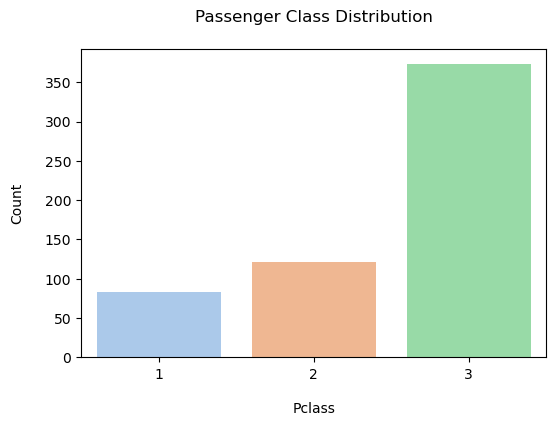

In [184]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df_cleaned, palette='pastel')
plt.title("Passenger Class Distribution",pad=20)
plt.xlabel("Pclass",labelpad=15)
plt.ylabel("Count",labelpad=15)
plt.show()

In [128]:
# Gender Distribution

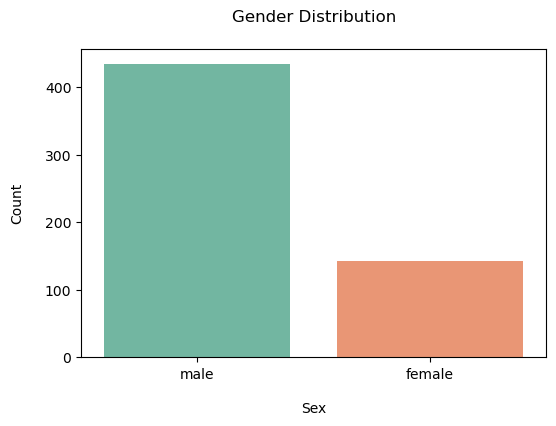

In [186]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df_cleaned, palette='Set2')
plt.title("Gender Distribution",pad=20)
plt.xlabel("Sex",labelpad=15)
plt.ylabel("Count",labelpad=15)
plt.show()

In [146]:
# Age Distribution

C:\Users\arisc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


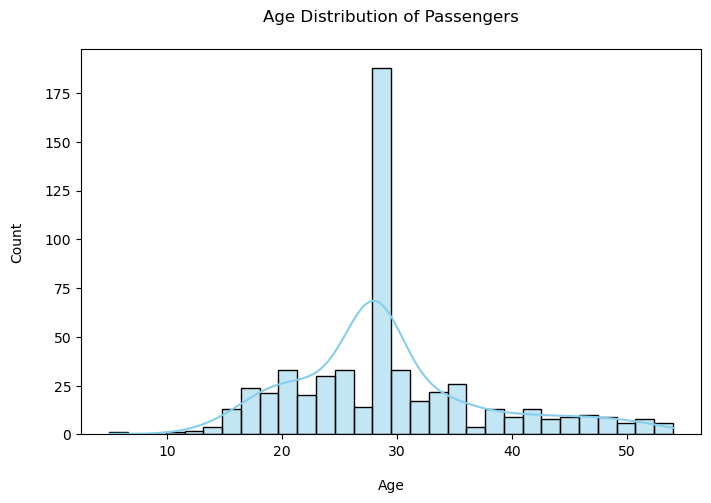

In [188]:
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution of Passengers",pad=20)
plt.xlabel("Age",labelpad=15)
plt.ylabel("Count",labelpad=15)
plt.show()

In [150]:
# Survival by Gender

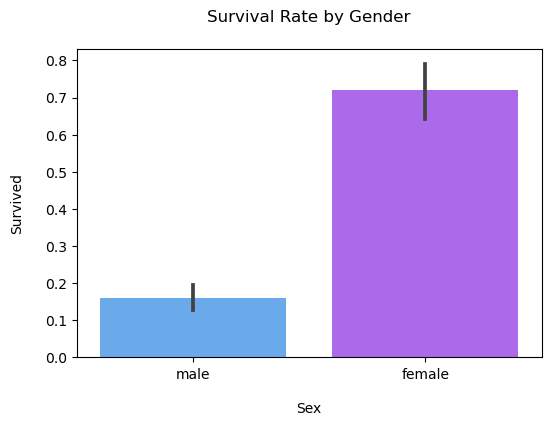

In [190]:
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df_cleaned, palette='cool')
plt.title("Survival Rate by Gender",pad=20)
plt.xlabel("Sex",labelpad=15)
plt.ylabel("Survived",labelpad=15)
plt.show()

In [158]:
# Survival by Class

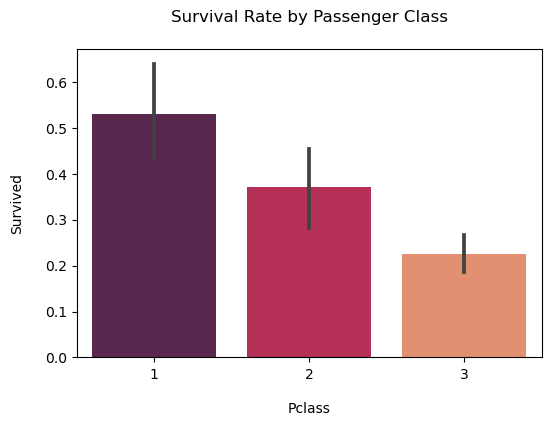

In [192]:
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df_cleaned, palette='rocket')
plt.title("Survival Rate by Passenger Class",pad=20)
plt.xlabel("Pclass",labelpad=15)
plt.ylabel("Survived",labelpad=15)
plt.show()

In [ ]:
# Age vs Survival

C:\Users\arisc\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


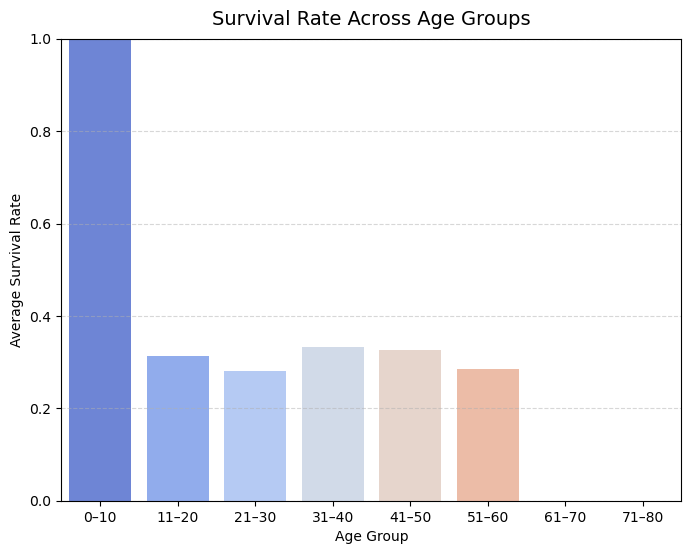

In [200]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80']

df_cleaned.loc[:, 'AgeGroup'] = pd.cut(df_cleaned['Age'], bins=age_bins, labels=age_labels)
age_survival = df_cleaned.groupby('AgeGroup', observed=False)['Survived'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='AgeGroup', y='Survived', data=age_survival, palette='coolwarm')
plt.title("Survival Rate Across Age Groups", fontsize=14, pad=10)
plt.xlabel("Age Group")
plt.ylabel("Average Survival Rate")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Survival by Class and Gender

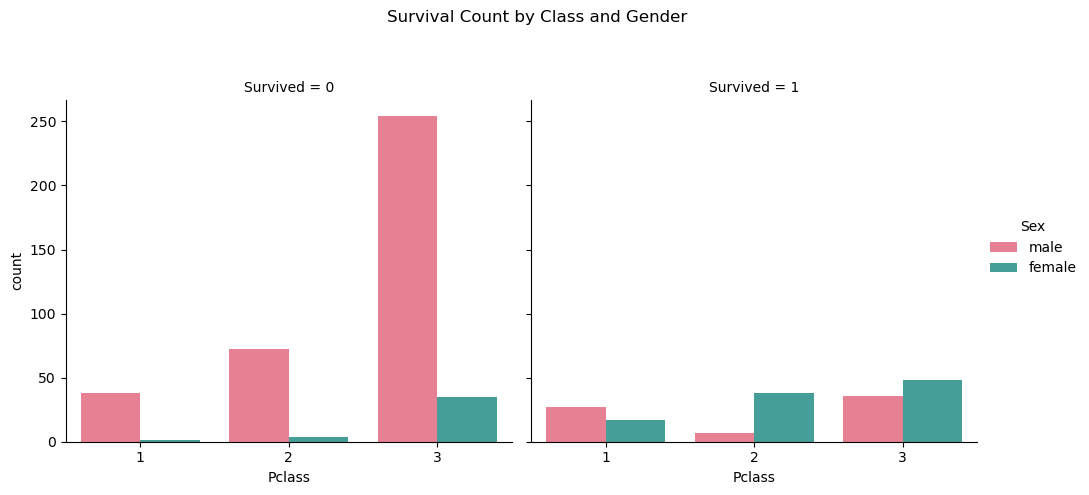

In [209]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', kind='count', data=df_cleaned, palette='husl')
plt.subplots_adjust(top=0.8)
plt.suptitle("Survival Count by Class and Gender")
plt.show()

In [211]:
# Correlation Heatmap

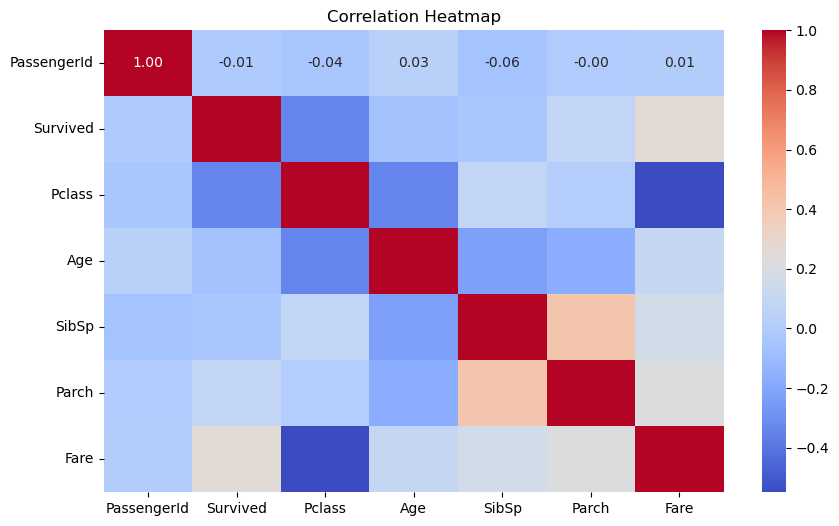

In [217]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()